In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, ticker
import astropy.constants as const
from astropy.io.votable import parse
import pandas as pd
clight = const.c.value    # speed of light [m s-1]
Jy = 1.0E-23        # Convert [Jy] to [erg s-1 cm-2 Hz-1]             

In [15]:
# Register the font
font_path = '/usr/share/fonts/liberation-sans/LiberationSans-Regular.ttf'
font_manager.fontManager.addfont(font_path)

# Get the actual family name (it must match the internal font name)
liberation = font_manager.FontProperties(fname=font_path)
font_name = liberation.get_name()  # usually "Liberation Sans"
print(font_name)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# Set it globally
plt.rcParams['font.family'] = font_name
plt.rcParams['font.sans-serif'] = [font_name]

plt.rcParams.update({
    'axes.linewidth': 0.5,      # axes spines
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.minor.width': 0.3,
    'ytick.minor.width': 0.3,
})

Liberation Sans


In [4]:
d = 436.            # put the distance to the source [pc]
Av = 9.6            # Extinction 

In [5]:
#====================================#
#            observation             #
#====================================#
# Spitzer spectrum
tem = pd.read_fwf('Kband_ukirt_monitoring.txt',header=None,comment='#')
data = np.array(tem)
date= data[:,0] ; jd=data[:,1] ; mag = data[:,2] ; merr = data[:,3]
mjd = jd-2400000.5

offset1 = 0.78
offset2 = 0.44

idx1 = np.where(mjd < 57603.)
idx2 = np.where(mjd > 58774.)
idx3 = np.where( (mjd > 57603)  & (mjd < 58774))
mag_offset = np.zeros(mag.shape[0])
mag_offset[idx1] = mag[idx1] - offset1
mag_offset[idx2] = mag[idx2] - offset2
mag_offset[idx3] = mag[idx3]

In [4]:
tem_wise = np.loadtxt(direc + 'EC53_post_w1_cavg.txt', skiprows=1).T
mjd_wise = tem_wise[0]; mag_wise = tem_wise[1]

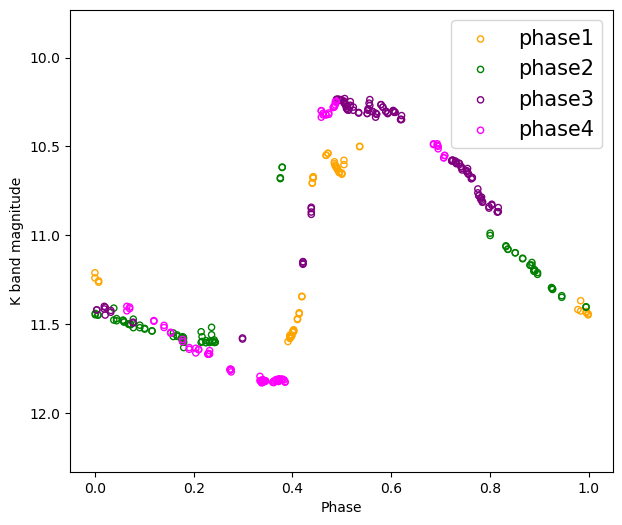

In [7]:
cday = 530
phase =(mjd-mjd[0])/cday

fig= plt.figure(figsize=(7,6)) 
ax = fig.add_subplot(1,1,1)
ecolor=['orange','g','purple','magenta']

parr = [] ; xarr = [] ; yarr=[]
for i in np.arange(4):
    idx = np.where((phase >= i) & (phase < i+1) )
    parr.append(idx)
    x = phase[idx]-i #/4
    y = mag_offset[idx]
  #  print(x)
    ax.scatter(x,y,s=20,facecolors='none',edgecolors=ecolor[i],label='phase'+str(i+1))
    for j in range(len(x)):
        xarr.append(x[j])
        yarr.append(y[j])
    # xarr.append(x)
    # yarr.append(y)



ax.set_xlabel('Phase')
ax.set_ylabel('K band magnitude')
#ax.set_xlim([6.5,7.5])
plt.rcParams.update({'font.size': 17})
ax.set_ylim([np.max(mag_offset)+0.5,np.min(mag_offset)-0.5])
plt.legend(fontsize=15)
#plt.savefig('phase_ec53.pdf',bbox_inches='tight')
#ax.set_ylim([12.4,9.6])
xarr = np.array(xarr)
yarr = np.array(yarr)

In [11]:
parr[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),)

In [8]:
s = np.argsort(xarr)
xx = xarr[s] ; yy = yarr[s]
phase =(mjd-mjd[0])/cday

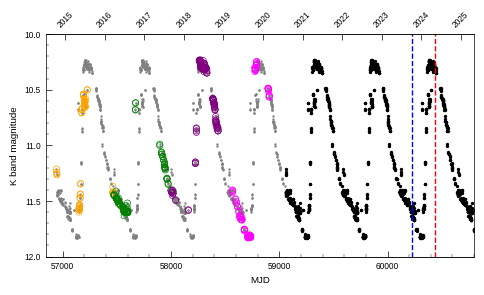

In [24]:
#parr = np.array(parr)

fig, ax = plt.subplots(1, 1, figsize=(12/2.54, 12/2.54*0.6), constrained_layout=True)

d_target = []
mag_target = []
for i in np.arange(0, 10):
    if 0<= i < 4:
        idx_p = parr[i][0]
        ax.scatter(mjd[idx_p],mag_offset[idx_p],s=20,
                   facecolors='none',edgecolors=ecolor[i],label='phase'+str(i+1), zorder=10, linewidths=0.5)
        ax.scatter(xx*cday+mjd[0]+(i*cday),yy,s=0.5,color='grey')
    else:
        ax.scatter(xx*cday+mjd[0]+(i*cday),yy,s=2,color='black')
        d = xx*cday+mjd[0]+(i*cday)
    if i == 5:
        d_target.append(d)
        mag_target.append(yy)

d_target = np.array(d_target) ; mag_target = np.array(mag_target)
ax.axvline(x=60222, color='b', lw=1, ls='--')
ax.axvline(x=60440, color='r', lw=1, ls='--')



ax.set_xlabel('MJD', fontsize=7)
ax.set_ylabel('K band magnitude', fontsize=7)
ax.set_xlim([mjd[parr[0][0]][0]-100,60800])
ax.set_ylim([12,10])
ax.tick_params(axis='both', which='major', length=4, labelsize=6)
ax.tick_params(axis='both', which='minor', length=2)

ax_ty = ax.twiny()
ax_ty.set_xlim(mjd[parr[0][0]][0]-100, 60800)
ax_ty.set_xticks([57023, 57388, 57754, 58119, 58484, 58849, 59215, 59580, 59945, 60310, 60676])
ax_ty.set_xticklabels(['2015','2016', '2017', '2018','2019', '2020', '2021','2022', '2023', '2024', '2025'], rotation=45)
ax_ty.tick_params(direction='in', axis='x', labelsize=6, length=4)
ax_ty.spines['left'].set_visible(False)
ax_ty.spines['right'].set_visible(False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))


fig.set_size_inches(12/2.54, 12/2.54*0.6)

fig.savefig('./Final_FigExt1.pdf', bbox_inches=None)